# Columbia Data Science Hackathon 2020 
### -------- COVID-19 Pandemic's Impact on NYC Transportation 

## 0. Introduction

Since the beginning of 2020, the COVID-19 pandemic has been quickly spreading all over the world, putting many people's health in danger and greatly changing everyone's normal life. New York, as one of the biggest and busiest city around the globe, is also the city, even without 'one of', that is affected by the pandemic most. In order to contain the spread of the virus and protect people's lives, New York Gov. Cuomo has passed strict work-from-home and social-distancing policies. But how much are people's lives affected? To what extent are people actually carrying out the policies? How has people's transportation changed during the pandemic. Our team wants to answer these questions from several different perspectives. In this notebook, we take a deep dive into the open source datasets about airport usage, NYC daily traffic data, usage of different vehicles, and etc.

## 1. Import Packages

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssn
import datetime
import numpy as np
%matplotlib inline
import os
import matplotlib

##2 Airport Traffic Analysis
We used the **covid19_geotab_mobility_impact.airport_traffic** dataset (Google Cloud dataset public ID: *bigquery-public-data:covid19_geotab_mobility_impact.airport_traffic*) to extract airport traffic data during the pandemic. 

We only select data about the three major airports of NYC: 

- John F. Kennedy International
- Newark Liberty International
- LaGuardia

In [386]:
airports = pd.read_csv('/content/sample_data/NY_airports.csv')

In [389]:
airports.info() # Make sure data is loaded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   aggregation_method   556 non-null    object 
 1   date                 556 non-null    object 
 2   version              556 non-null    float64
 3   airport_name         556 non-null    object 
 4   percent_of_baseline  556 non-null    float64
 5   center_point_geom    556 non-null    object 
 6   city                 556 non-null    object 
 7   state_region         556 non-null    object 
 8   country_iso_code_2   556 non-null    object 
 9   country_name         556 non-null    object 
 10  airport_geom         556 non-null    object 
dtypes: float64(2), object(9)
memory usage: 47.9+ KB


Convert **date** column to pandas date time object

In [393]:
airports["date"] = pd.to_datetime(airports["date"])

In [394]:
JFK = airports[airports['airport_name'] == 'John F. Kennedy International']
Newark = airports[airports['city'] == 'Newark']
laguardia = airports[airports['airport_name'] == 'LaGuardia']

We only care about two fields (columns) in the dataset:
- date
- percent_of_baseline

In [395]:
# Extract the two columns that we care about
JFK = JFK[['date', 'percent_of_baseline']]
Newark = Newark[['date', 'percent_of_baseline']]
laguardia = laguardia[['date', 'percent_of_baseline']]

In [402]:
# Make sure JFK is loaded
JFK.info()
JFK.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 185 to 370
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 186 non-null    datetime64[ns]
 1   percent_of_baseline  186 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


,date,percent_of_baseline
185,2020-07-21,63.0
186,2020-04-12,62.0
187,2020-03-25,52.0
188,2020-04-26,64.0
189,2020-06-14,85.0


In [403]:
# Make sure Newark is loaded
Newark.info()
Newark.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 371 to 555
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 185 non-null    datetime64[ns]
 1   percent_of_baseline  185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


,date,percent_of_baseline
371,2020-07-21,100.0
372,2020-04-12,64.0
373,2020-03-25,70.0
374,2020-04-26,55.0
375,2020-06-14,84.0


In [404]:
# Make sure LaGuardia is loaded
laguardia.info()
laguardia.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 185 non-null    datetime64[ns]
 1   percent_of_baseline  185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 KB


,date,percent_of_baseline
0,2020-07-21,60.0
1,2020-04-12,59.0
2,2020-03-25,68.0
3,2020-04-26,55.0
4,2020-06-14,54.0


Now we start working on the data. To see the impact on airport traffic more clearly, we only choose weekday results from the dataset. Also, to remove outliers (e.g. National Holidays when people tend to stay at home for celebration), we plot data from every three days.

Below is the plot for **John F. Kennedy International** airport traffic data.

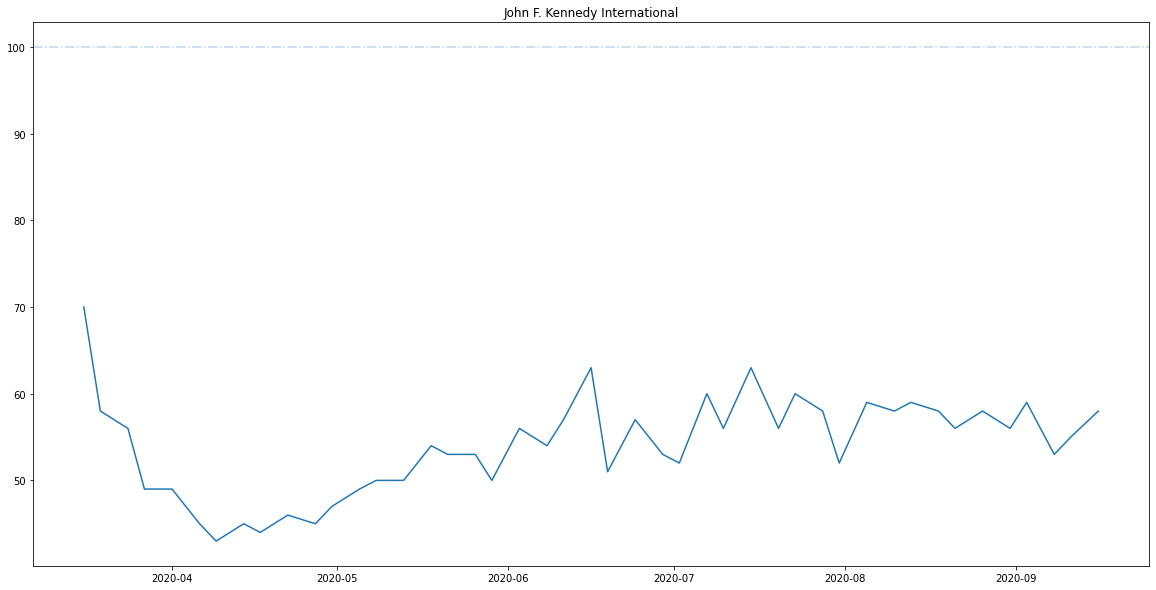

In [406]:
JFK["date"] = pd.to_datetime(JFK["date"])
JFK = JFK.sort_values(by='date')
JFK = JFK[(JFK["date"].dt.weekday >= 0) & (JFK["date"].dt.weekday <= 4)]
JFK = JFK.iloc[::3, :]
plt.figure(figsize=(20,10))
plt.plot(JFK["date"], JFK["percent_of_baseline"])
plt.axhline(y=100, ls='-.', alpha=0.3)
plt.title('John F. Kennedy International')
plt.show()

Below is the plot for **Newark Liberty International** airport traffic data.

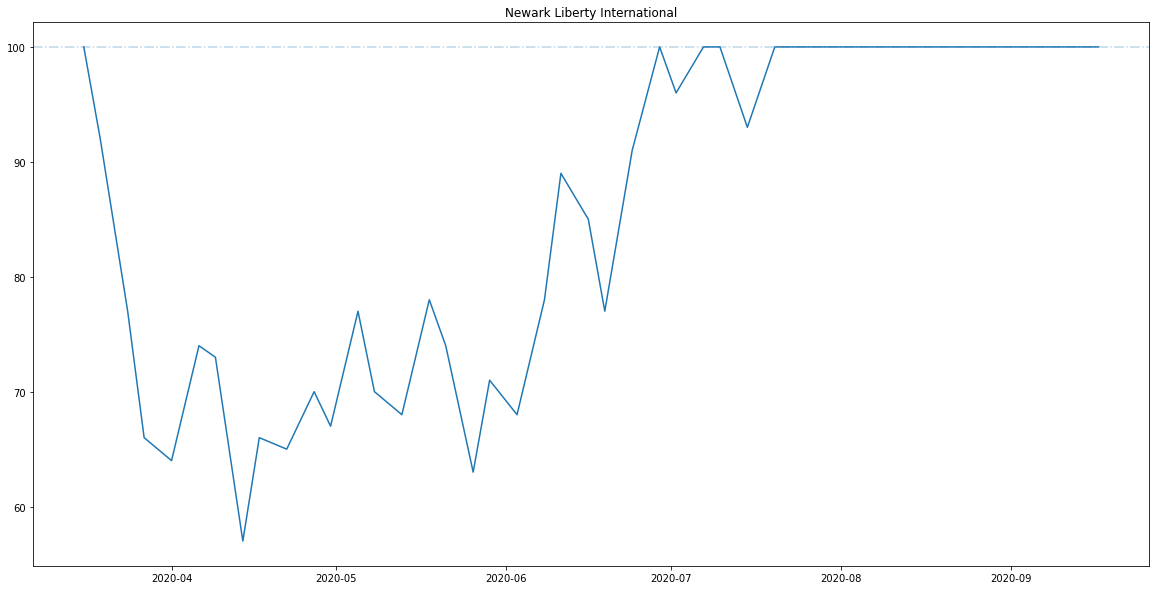

In [405]:
#Plot from 3/16 to 9/17
Newark["date"] = pd.to_datetime(Newark["date"])
Newark = Newark.sort_values(by='date')
Newark = Newark[(Newark["date"].dt.weekday >= 0) & (Newark["date"].dt.weekday <= 4)]
Newark = Newark.iloc[::3, :]
plt.figure(figsize=(20,10))
plt.plot(Newark["date"], Newark["percent_of_baseline"])
plt.axhline(y=100, ls='-.', alpha=0.3)
plt.title('Newark Liberty International')
plt.show()

Below is the plot for **LaGuardia** airport traffic data.

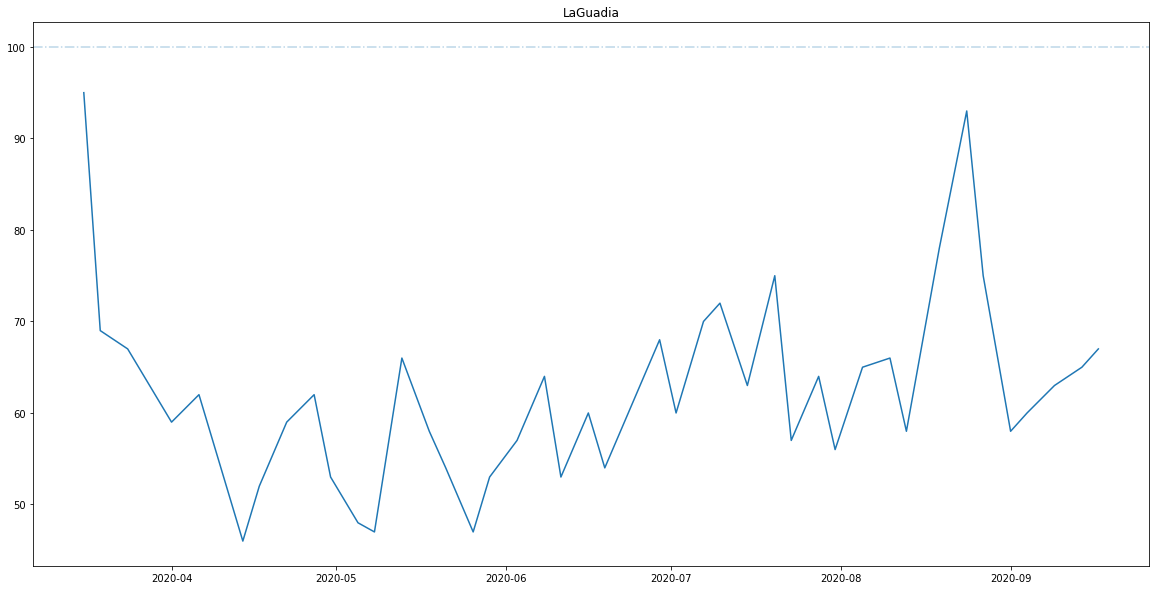

In [407]:
laguardia["date"] = pd.to_datetime(laguardia["date"])
laguardia = laguardia.sort_values(by='date')
laguardia = laguardia[(laguardia["date"].dt.weekday >= 0) & (laguardia["date"].dt.weekday <= 4)]
laguardia = laguardia.iloc[::3, :]
plt.figure(figsize=(20,10))
plt.plot(laguardia["date"], laguardia["percent_of_baseline"])
plt.axhline(y=100, ls='-.', alpha=0.3)
plt.title('LaGuadia')
plt.show()

## 3. Road Congestion Analysis
We used the **covid19_geotab_mobility_impact.city_congestion** dataset (Google Cloud public ID: *bigquery-public-data:covid19_geotab_mobility_impact.city_congestion*). We only select rows collected from New York City from the table to get quantative data of NYC road traffic.

In [408]:
congestion = pd.read_csv('/content/sample_data/NY_congestion.csv')

In [409]:
# Make sure congestion is loaded
congestion.info()
congestion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5796 non-null   object 
 1   date_time           5796 non-null   object 
 2   percent_congestion  5796 non-null   float64
dtypes: float64(1), object(2)
memory usage: 136.0+ KB


,city_name,date_time,percent_congestion
0,New York,2020-01-31 19:00:00,46.761767
1,New York,2020-01-31 20:00:00,38.642181
2,New York,2020-01-31 21:00:00,36.396655
3,New York,2020-01-31 22:00:00,33.380019
4,New York,2020-01-31 23:00:00,26.066712


Convert **date** column to pandas date time object

In [410]:
congestion["date_time"] = pd.to_datetime(congestion["date_time"])

We first sort the data by time order. 

Then we only take the data **after Feb.25** for two major reasons:
- People already went back to **normal work** at that time, after the Christmas break, which could have been long for some people.
- We keep some data **before the quarantine** in order to compare how much was the impact of the pandemic.

In [411]:
congestion = congestion.sort_values(by = 'date_time')
congestion = congestion[congestion["date_time"] > datetime.datetime(year=2020,month=2,day=25, hour = 0)]

We pick 3 representative time point in a single day:
- **7 a.m.** which represents **normal morning traffic peak** in NYC
- **1 p.m.** which represents **normal working hour** (which means less traffic) in NYC
- **4 p.m.** which represents **normal evening traffic peak** in NYC

In [412]:
morning_peak = congestion[congestion["date_time"].dt.hour == 7]
morning_peak = morning_peak[['date_time', 'percent_congestion']]
free_time = congestion[congestion["date_time"].dt.hour == 13]
free_time = free_time[['date_time', 'percent_congestion']]
night_peak = congestion[congestion["date_time"].dt.hour == 16]
night_peak = night_peak[['date_time', 'percent_congestion']]

Also, we split week day and weekends just to see the difference.

In [413]:
weekday_morning_peak = morning_peak[(morning_peak["date_time"].dt.weekday >= 0) & (morning_peak["date_time"].dt.weekday <= 4)]
weekend_morning_peak = morning_peak[(morning_peak["date_time"].dt.weekday >= 5)]
weekday_free_time = free_time[(free_time["date_time"].dt.weekday >= 0) & (free_time["date_time"].dt.weekday <= 4)]
weekend_free_time = free_time[(free_time["date_time"].dt.weekday >= 5)]
weekday_night_peak = night_peak[(night_peak["date_time"].dt.weekday >= 0) & (night_peak["date_time"].dt.weekday <= 4)]
weekend_night_peak = night_peak[(night_peak["date_time"].dt.weekday >= 5)]

We plot the curves of 3 significant time stamps of weekdays in a single figure.

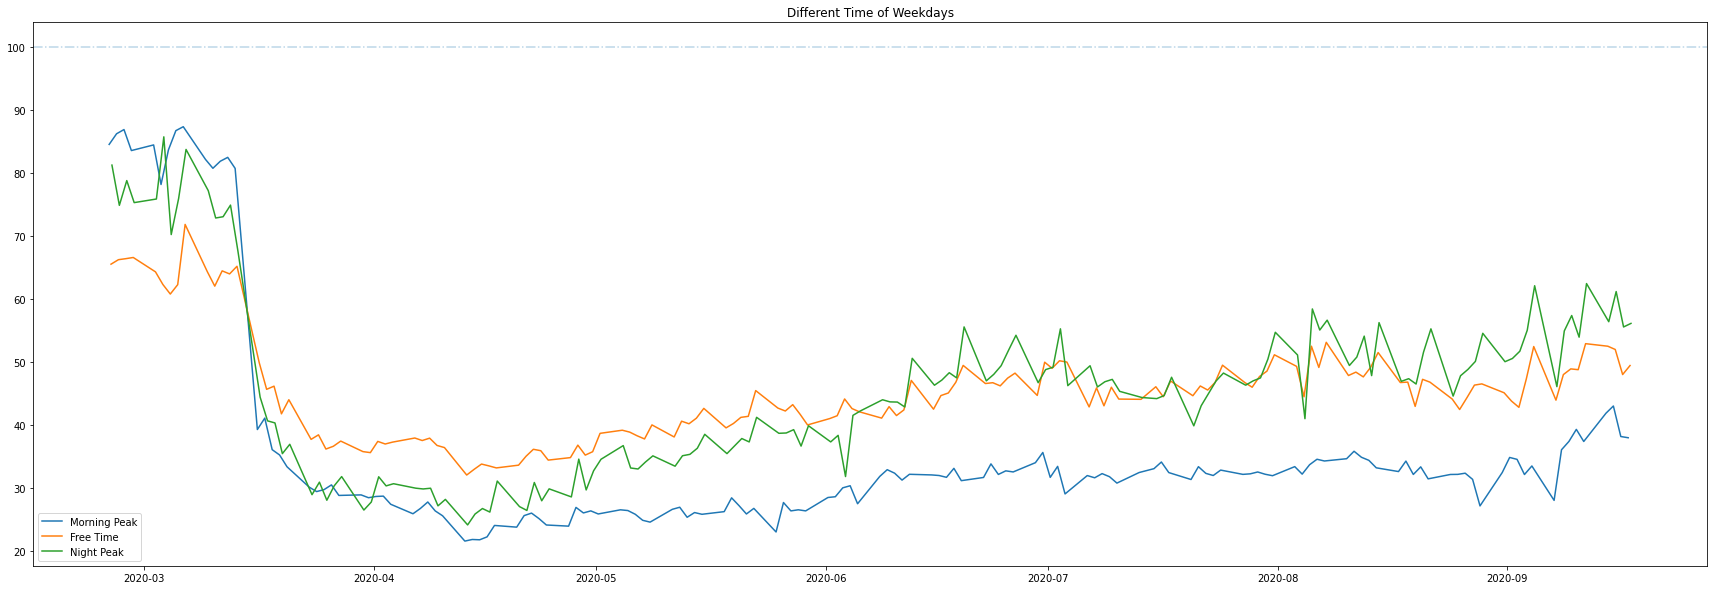

In [414]:
plt.figure(figsize=(30,10))
plt.plot(weekday_morning_peak["date_time"], weekday_morning_peak["percent_congestion"], label='Morning Peak')
plt.plot(weekday_free_time["date_time"], weekday_free_time["percent_congestion"], label='Free Time')
plt.plot(weekday_night_peak["date_time"], weekday_night_peak["percent_congestion"], label='Night Peak')
plt.legend()
plt.axhline(y=100, ls='-.', alpha=0.3)
plt.title('Different Time of Weekdays')
plt.show()

We plot the curves of 3 significant time stamps of weekends in a single figure.

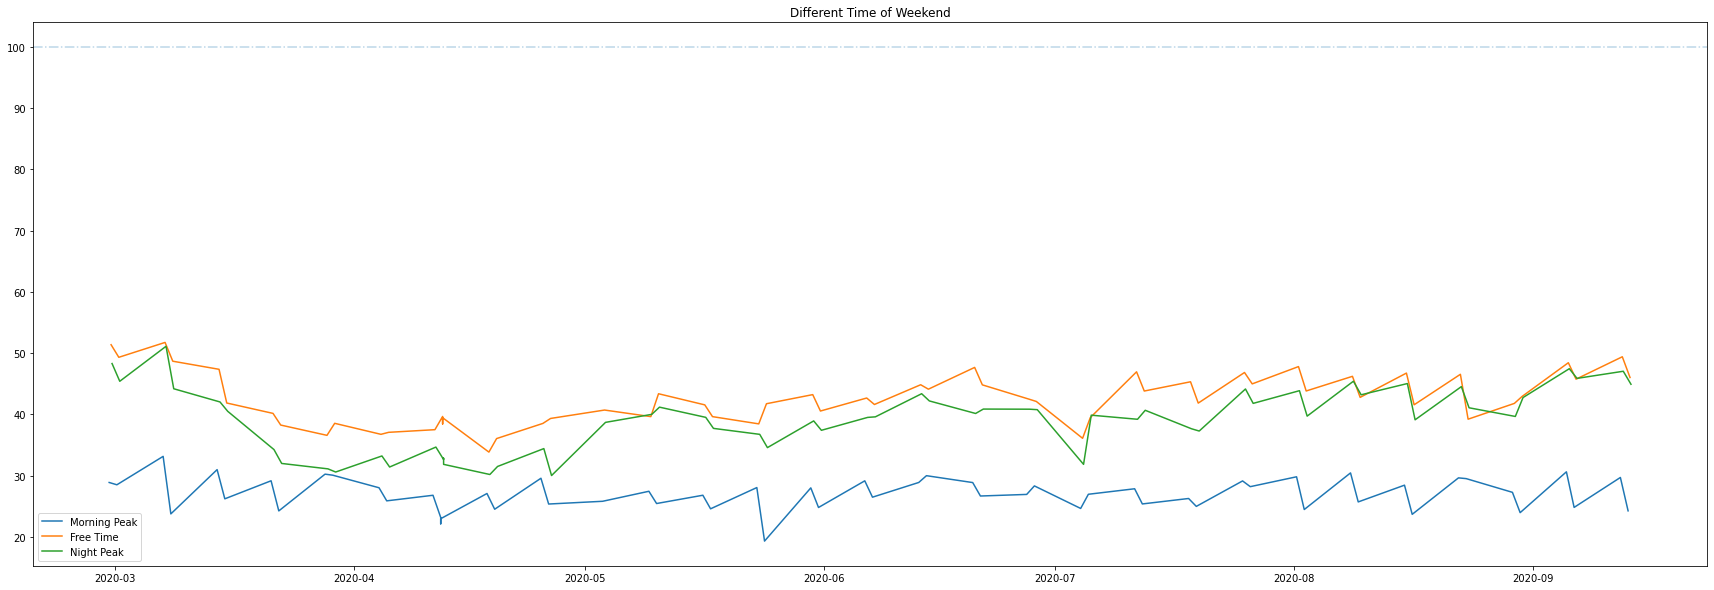

In [415]:
plt.figure(figsize=(30,10))
plt.plot(weekend_morning_peak["date_time"], weekend_morning_peak["percent_congestion"], label='Morning Peak')
plt.plot(weekend_free_time["date_time"], weekend_free_time["percent_congestion"], label='Free Time')
plt.plot(weekend_night_peak["date_time"], weekend_night_peak["percent_congestion"], label='Night Peak')
plt.legend()
plt.axhline(y=100, ls='-.', alpha=0.3)
plt.title('Different Time of Weekend')
plt.show()

## 4. Public Transit Stations Passenger Flow Analysis
We used the **covid19_google_mobility.mobility_report** dataset (Google Cloud public ID: *bigquery-public-data:covid19_google_mobility.mobility_report*). We only select rows collected from New York City from the table.

In [295]:
transit = pd.read_csv('/content/sample_data/NY_transit.csv')

We only care about two fields/columns in this part:
- **date**
- **transit_stations_percent_change_from_baseline**

In [416]:
transit = transit[['date', 'transit_stations_percent_change_from_baseline']]

Convert **date** column to pandas date time object.

In [417]:
transit["date"] = pd.to_datetime(transit["date"])
transit = transit.sort_values(by='date')

We split weekday data and weekend data.

In [418]:
weekday_transit = transit[(transit["date"].dt.weekday >= 0) & (transit["date"].dt.weekday <= 4)]
weekend_transit = transit[(transit["date"].dt.weekday >= 5)]

Plot weekday data.

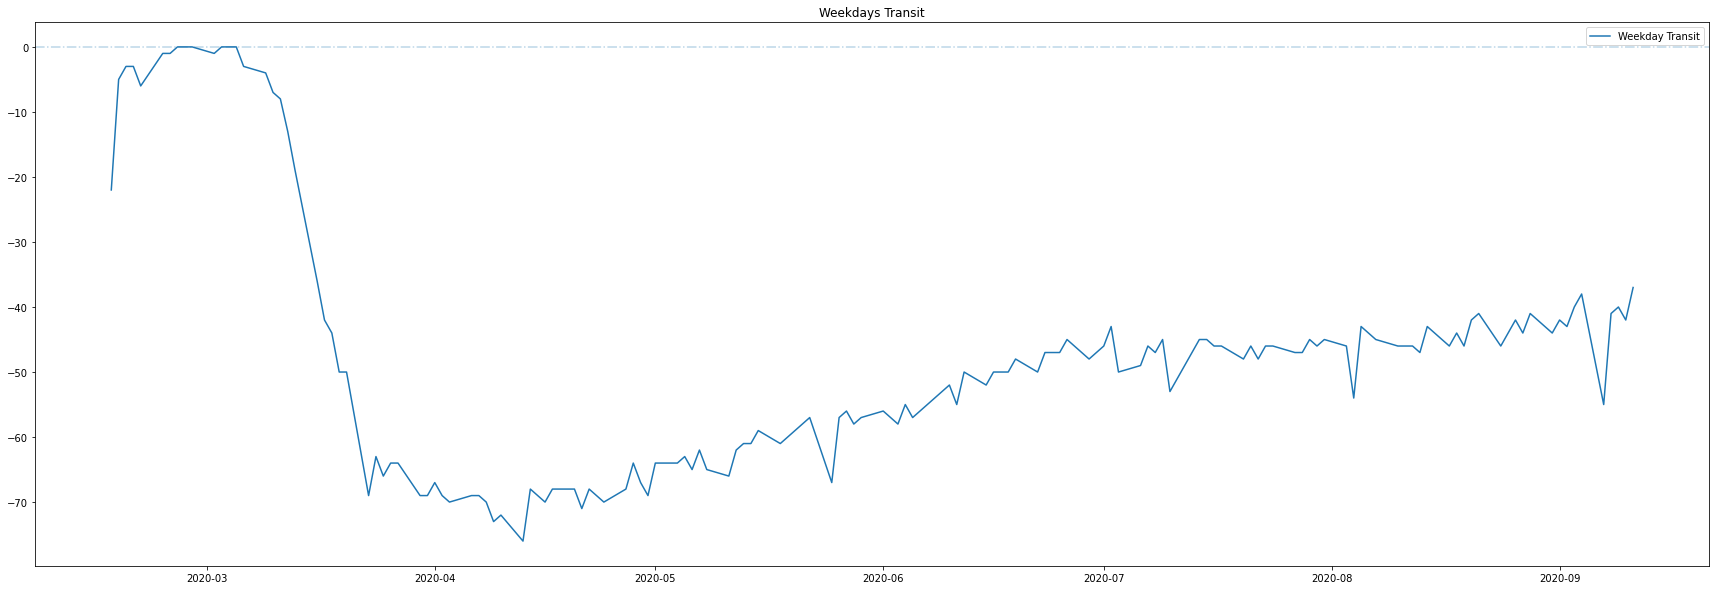

In [419]:
plt.figure(figsize=(30,10))
plt.plot(weekday_transit["date"], weekday_transit["transit_stations_percent_change_from_baseline"], label='Weekday Transit')
plt.legend()
plt.axhline(y=0, ls='-.', alpha=0.3)
plt.title('Weekdays Transit')
plt.show()

Plot weekend data.

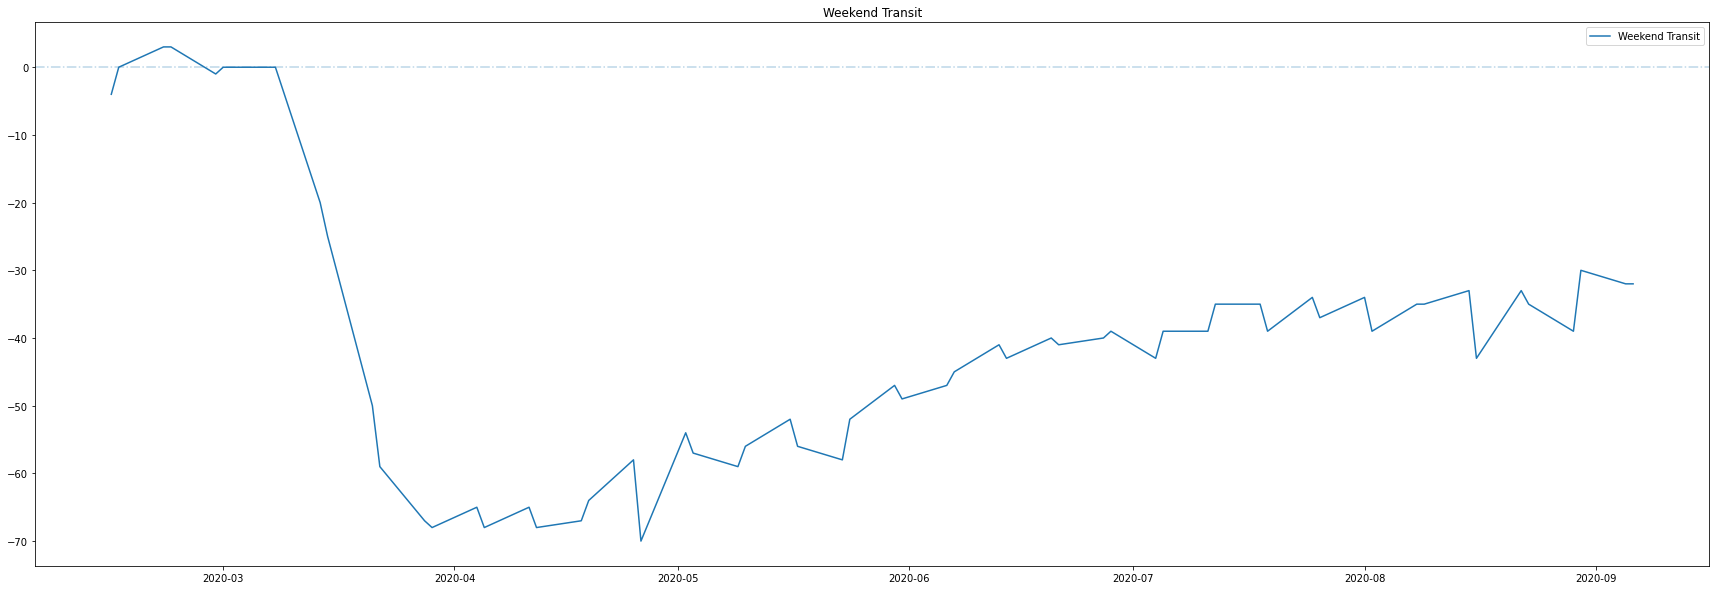

In [420]:
plt.figure(figsize=(30,10))
plt.plot(weekend_transit["date"], weekend_transit["transit_stations_percent_change_from_baseline"], label='Weekend Transit')
plt.legend()
plt.axhline(y=0, ls='-.', alpha=0.3)
plt.title('Weekend Transit')
plt.show()

## 5. Different Vehicle Usage Analysis
We used the dataset **covid19_geotab_mobility_impact.fuel_station_daily_fillups** (Google Cloud public ID: *bigquery-public-data:covid19_geotab_mobility_impact.fuel_station_daily_fillups*). We **simulate** car vehicle usage by the fuel fillup data of different kinds of vehicles. 

In [421]:
fuel = pd.read_csv('/content/sample_data/fuel.csv')

In [423]:
# Make sure fuel is loaded
fuel.info()
fuel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1128 non-null   object 
 1   vehicle_class             1128 non-null   object 
 2   percent_of_normal_volume  1128 non-null   float64
 3   version                   1128 non-null   float64
dtypes: float64(2), object(2)
memory usage: 35.4+ KB


,date,vehicle_class,percent_of_normal_volume,version
0,2020-06-10,MPV,104.61,1.0
1,2020-06-10,LDT,158.01,1.0
2,2020-06-10,MDT,124.55,1.0
3,2020-06-10,Bus,20.13,1.0
4,2020-06-10,Passenger,87.40,1.0


Convert **date** to pandas date time object.

In [424]:
fuel["date"] = pd.to_datetime(fuel["date"])

We remove the last column '**version**', which is obviously irrelevant in our analysis, from our table.

In [339]:
fuel = fuel[['date', 'vehicle_class', 'percent_of_normal_volume']]

Find out how many different vehicle types are there.

In [425]:
fuel['vehicle_class'].unique()

array(['MPV', 'LDT', 'MDT', 'Bus', 'Passenger', 'HDT'], dtype=object)

For each class of vehicle, create a sub-table and only keep two fields/columns:
- **date**
- **percent_of_normal_volume**

Sort each sub-table by time order.

In [426]:
MPV = fuel[fuel['vehicle_class'] == 'MPV']
LDT = fuel[fuel['vehicle_class'] == 'LDT']
Bus = fuel[fuel['vehicle_class'] == 'Bus']
Passenger = fuel[fuel['vehicle_class'] == 'Passenger']
MDT = fuel[fuel['vehicle_class'] == 'MDT']
HDT = fuel[fuel['vehicle_class'] == 'HDT']

MPV = MPV[['date', 'percent_of_normal_volume']]
LDT = LDT[['date', 'percent_of_normal_volume']]
Bus = Bus[['date', 'percent_of_normal_volume']]
Passenger = Passenger[['date', 'percent_of_normal_volume']]
MDT = MDT[['date', 'percent_of_normal_volume']]
HDT = HDT[['date', 'percent_of_normal_volume']]

MPV = MPV.sort_values(by='date')
LDT = LDT.sort_values(by='date')
Bus = Bus.sort_values(by='date')
Passenger = Passenger.sort_values(by='date')
MDT = MDT.sort_values(by='date')
HDT = HDT.sort_values(by='date')

Plot curves of all six classes in a single figure.

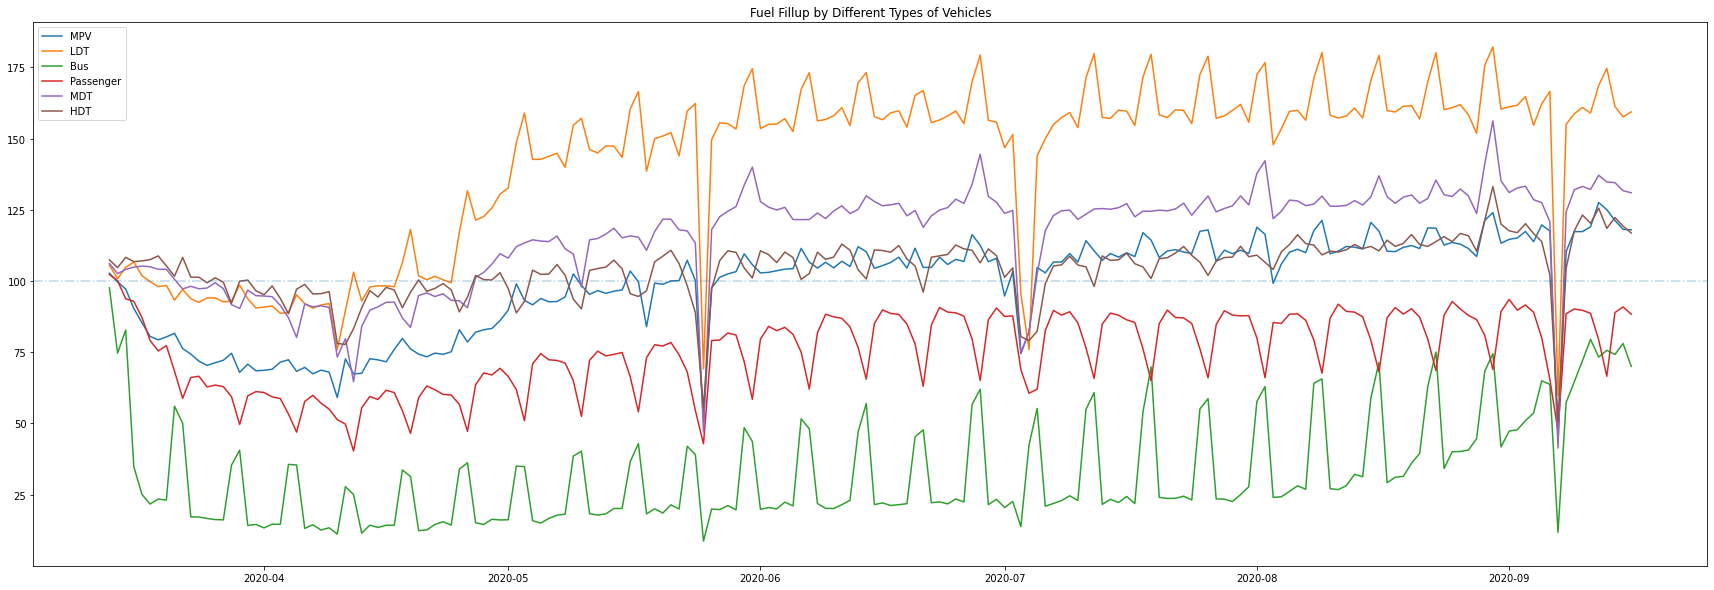

In [427]:
plt.figure(figsize=(30,10))
plt.plot(MPV["date"], MPV["percent_of_normal_volume"], label='MPV')
plt.plot(LDT["date"], LDT["percent_of_normal_volume"], label='LDT')
plt.plot(Bus["date"], Bus["percent_of_normal_volume"], label='Bus')
plt.plot(Passenger["date"], Passenger["percent_of_normal_volume"], label='Passenger')
plt.plot(MDT["date"], MDT["percent_of_normal_volume"], label='MDT')
plt.plot(HDT["date"], HDT["percent_of_normal_volume"], label='HDT')
plt.legend()
plt.axhline(y=100, ls='-.', alpha=0.3)
plt.title('Fuel Fillup by Different Types of Vehicles')
plt.show()